#이변수 연속형 자료의 표현을 위한 기본 산점도의 옵션 

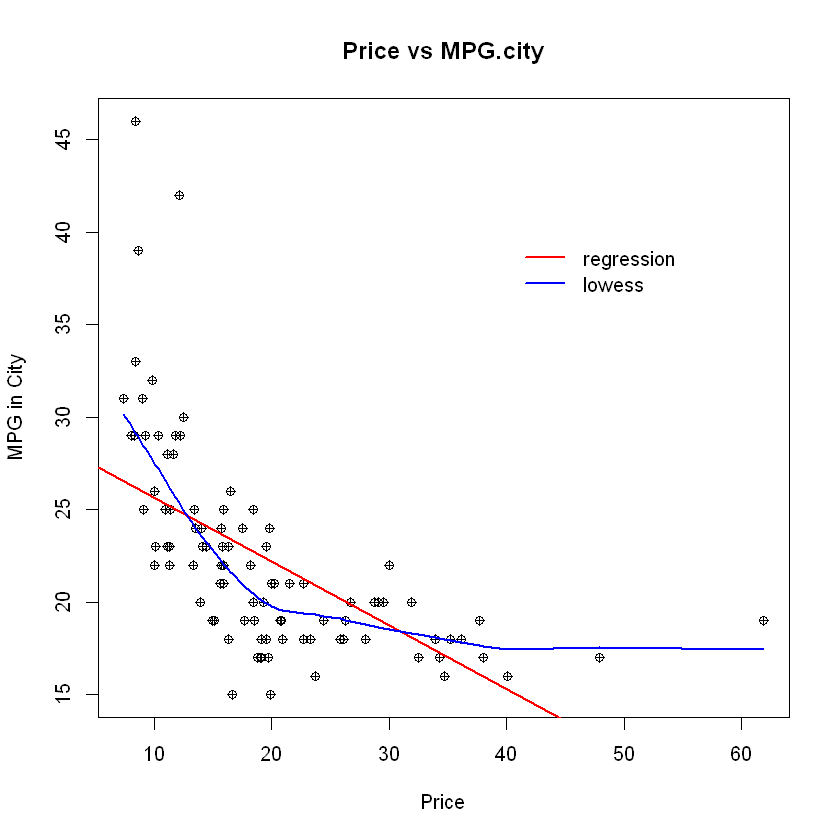

In [1]:
#기본 산점도 
library(MASS)
with(Cars93, plot(Price, MPG.city, main="Price vs MPG.city", xlab="Price", 
                  ylab="MPG in City", pch=10))
with(Cars93, abline(lm(MPG.city~Price), col="red", lwd=2))
with(Cars93, lines(lowess(Price,MPG.city), col="blue", lwd=2)) #lowess 직선의 제한을 완화해서 부드럽게 두 변수의 관계 설명하는 모형
legend(40,40,lty=1,col=c("red","blue"), c('regression','lowess'), lwd=2, bty="n")

Warning message:
"package 'vcd' was built under R version 3.6.3"Loading required package: grid


       ID          Treatment      Sex          Age          Improved 
 Min.   : 1.00   Placebo:43   Female:59   Min.   :23.00   None  :42  
 1st Qu.:21.75   Treated:41   Male  :25   1st Qu.:46.00   Some  :14  
 Median :42.50                            Median :57.00   Marked:28  
 Mean   :42.50                            Mean   :53.36              
 3rd Qu.:63.25                            3rd Qu.:63.00              
 Max.   :84.00                            Max.   :74.00              

         Improved
Treatment None Some Marked
  Placebo   19    7      6
  Treated    6    5     16

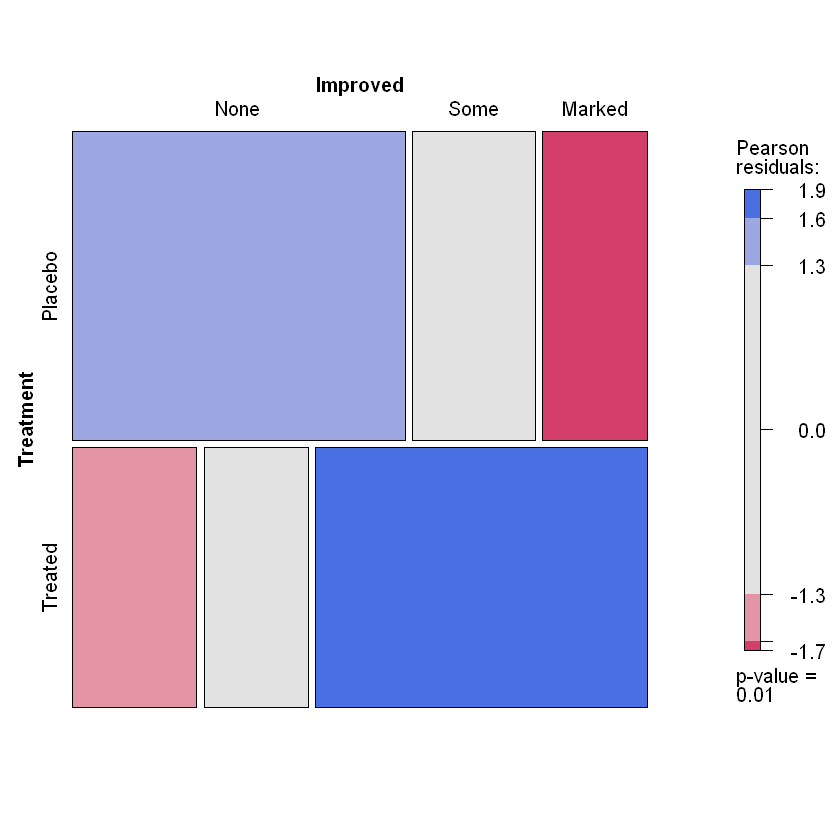

In [2]:
#다변수 자료의 요약
#vcd 패키지를 활용한 모자이크 그림
library(vcd)
summary(Arthritis)
art <- xtabs(~Treatment+Improved, data=Arthritis, subset=Sex == "Female")
art #교차표 생성
mosaic (art, gp= shading_max)
#pearson residuals = 실제 데이터에서 기대도수를 빼고 나눈 숫자 

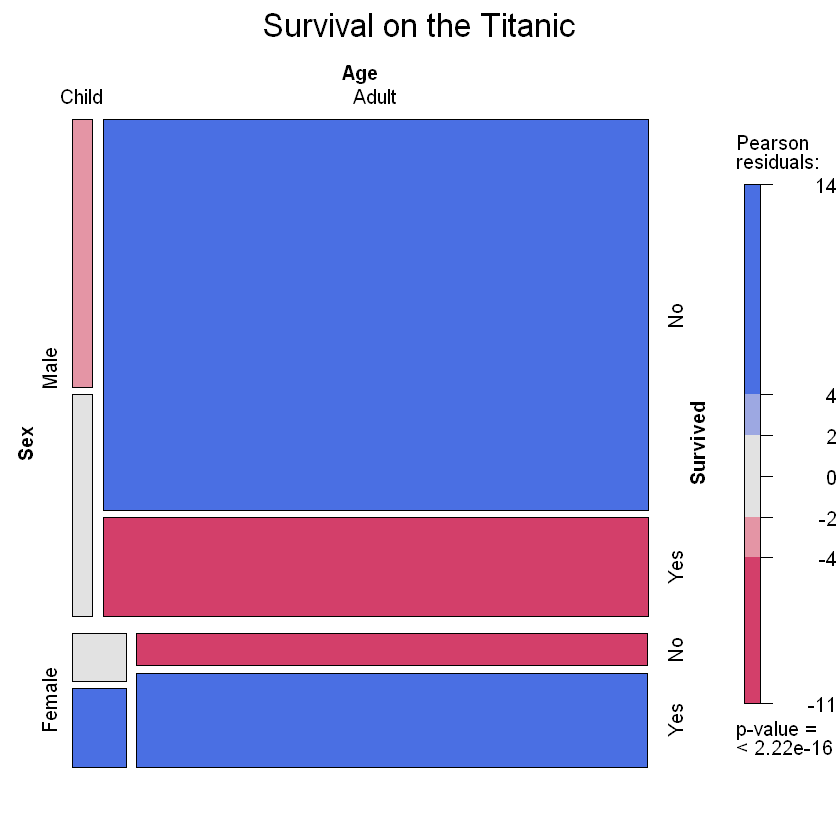

In [5]:
mosaic(~Sex+Age+Survived, data=Titanic, main="Survival on the Titanic", shade=TRUE, legend=TRUE)

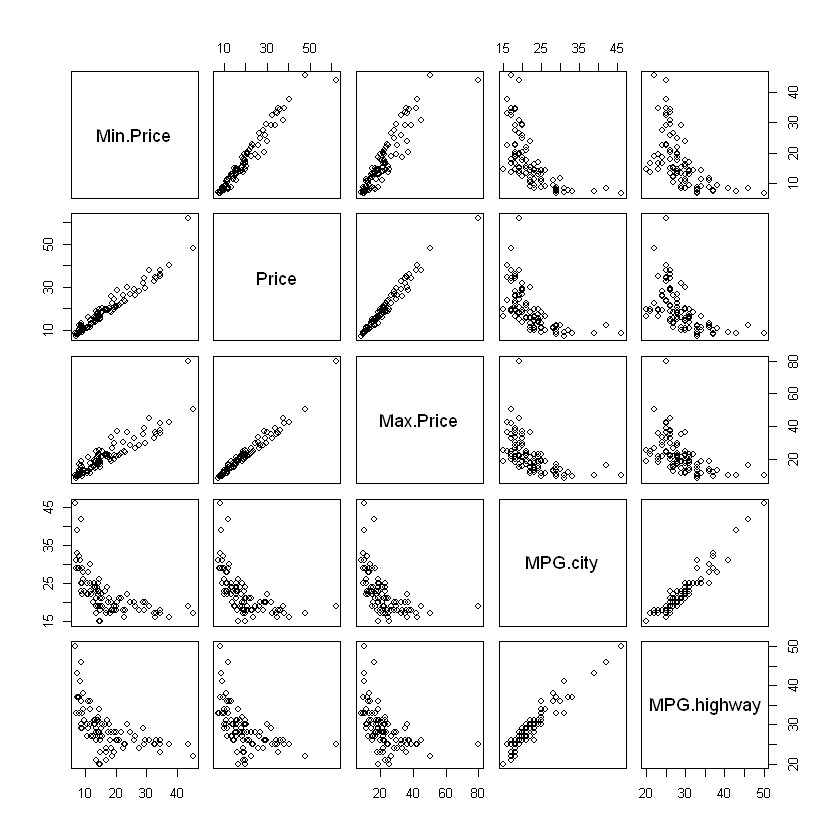

In [6]:
#다중 산점도 
dat1 <- subset(Cars93, select=c(Min.Price, Price, Max.Price, MPG.city, MPG.highway))
pairs(dat1)

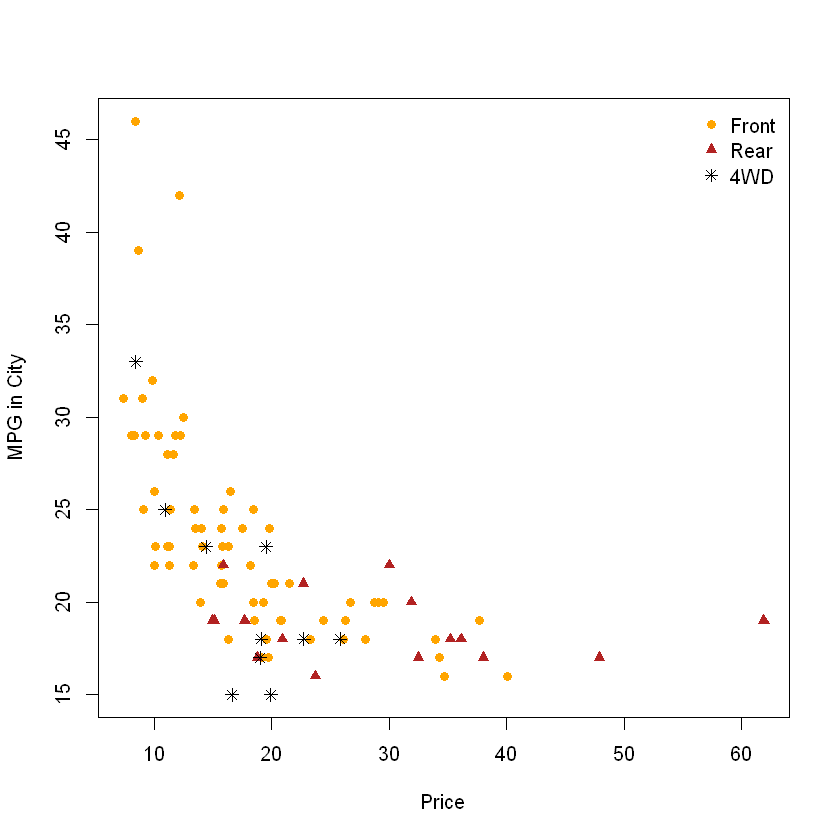

In [7]:
#단순 산점도 - 그룹별 산점도
with(Cars93, plot(Price, MPG.city, xlab='Price', ylab='MPG in City', type='n'))
with (subset(Cars93, DriveTrain=='Front'), points(Price, MPG.city, col='orange', 
                                                  pch=19))
with (subset(Cars93, DriveTrain=='Rear'), points(Price, MPG.city, col='firebrick', 
                                                  pch=17))
with (subset(Cars93, DriveTrain=='4WD'), points(Price, MPG.city, col='black', 
                                                  pch=8))
legend("topright", legend=c('Front','Rear','4WD'), col=c('orange','firebrick','black'),
       pch=c(19,17,8), bty='n')

In [8]:
#단순산점도에 회귀선 추가하기 
fit1 <- with(subset(Cars93, DriveTrain=='Front'), lm(MPG.city~Price))
fit2 <- with(subset(Cars93, DriveTrain=='Rear'), lm(MPG.city~Price))
fit3 <- with(subset(Cars93, DriveTrain=='4WD'), lm(MPG.city~Price))

xx1<-subset(Cars93, DriveTrain=='Front')$Price
yy1<-fit1$coef[1]+fit1$coef[2]*xx1

xx2<-subset(Cars93, DriveTrain=='Rear')$Price
yy2<-fit2$coef[1]+fit2$coef[2]*xx2

xx3<-subset(Cars93, DriveTrain=='4WD')$Price
yy3<-fit3$coef[1]+fit3$coef[2]*xx3

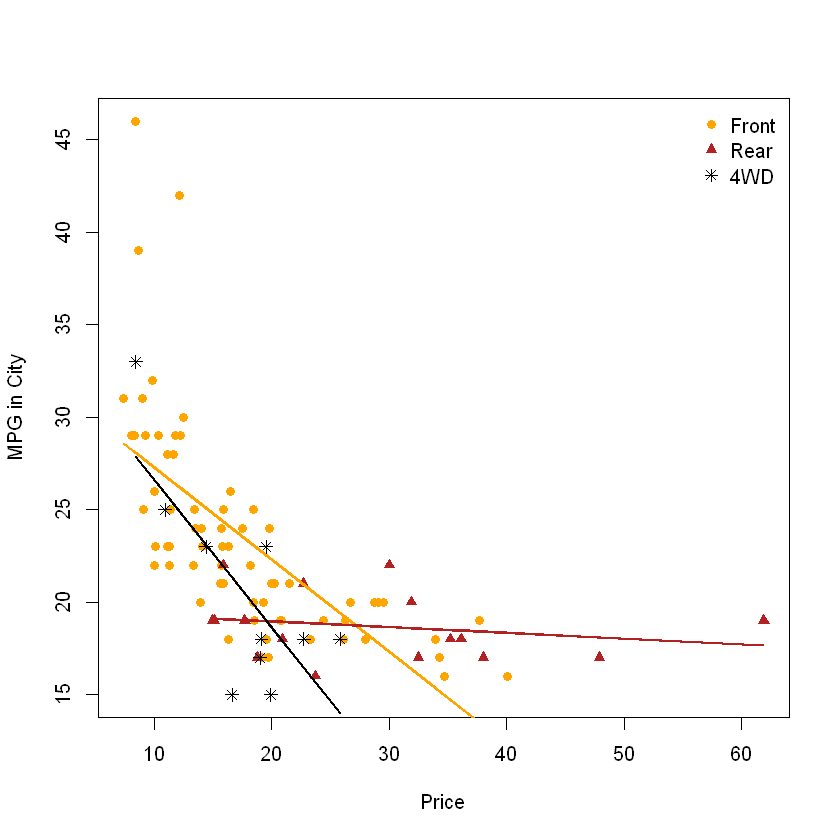

In [9]:
with(Cars93, plot(Price, MPG.city, xlab='Price', ylab='MPG in City', type='n'))
with (subset(Cars93, DriveTrain=='Front'), points(Price, MPG.city, col='orange', 
                                                  pch=19))
with (subset(Cars93, DriveTrain=='Rear'), points(Price, MPG.city, col='firebrick', 
                                                 pch=17))
with (subset(Cars93, DriveTrain=='4WD'), points(Price, MPG.city, col='black', 
                                                pch=8))
legend("topright", legend=c('Front','Rear','4WD'), col=c('orange','firebrick','black'),
       pch=c(19,17,8), bty='n')
lines(xx1,yy1,col='orange',lwd=2)
lines(xx2,yy2,col='firebrick',lwd=2)
lines(xx3,yy3,col='black', lwd=2)

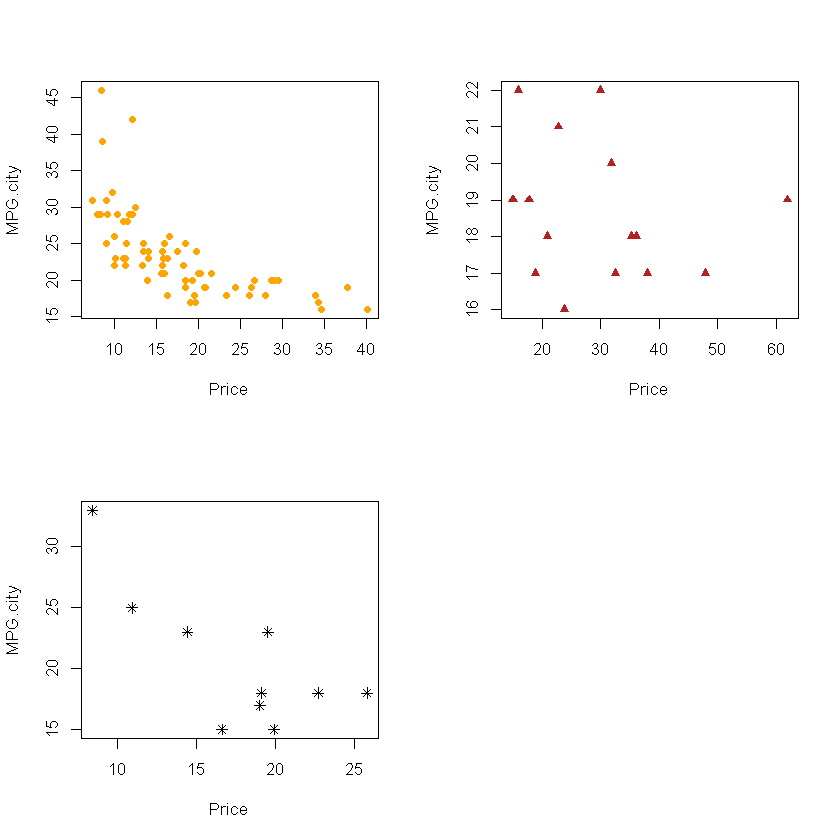

In [10]:
#여러 개의 그림 동시에 표현하기
par(mfrow=c(2,2))
with (subset(Cars93, DriveTrain=='Front'), plot(Price, MPG.city, col='orange', 
                                                  pch=19))
with (subset(Cars93, DriveTrain=='Rear'), plot(Price, MPG.city, col='firebrick', 
                                                 pch=17))
with (subset(Cars93, DriveTrain=='4WD'), plot(Price, MPG.city, col='black', 
                                                pch=8))

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

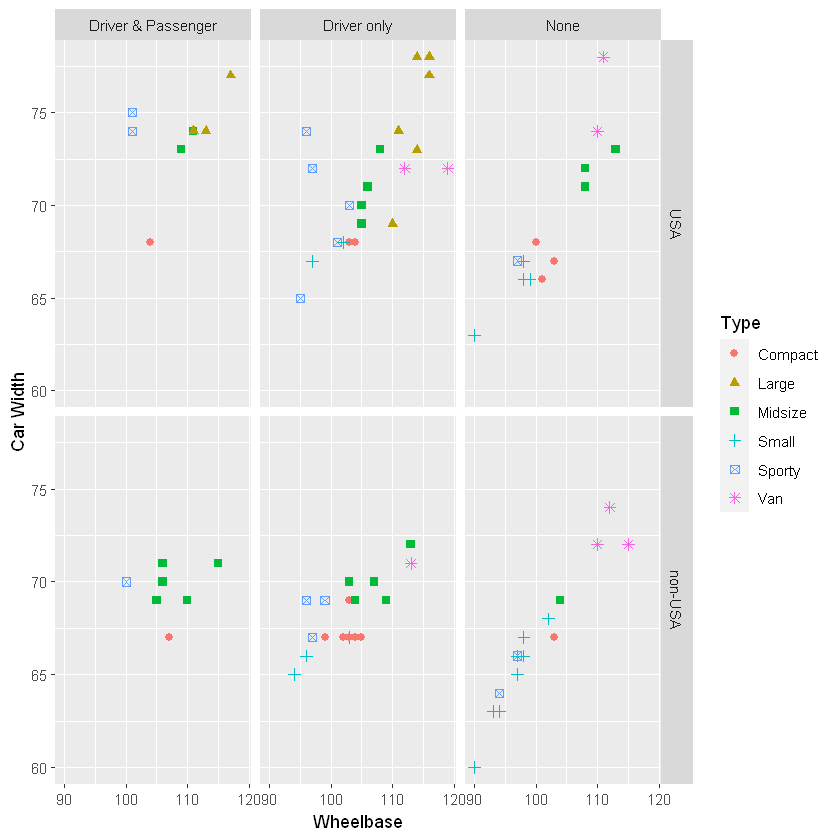

In [11]:
#그룹별 산점도 
library(ggplot2)
qplot(Wheelbase, Width, data=Cars93, shape=Type, color=Type, facets=Origin~AirBags,
      size=I(2), xlab="Wheelbase", ylab="Car Width")

also installing the dependencies 'gridBase', 'igraph'



package 'gridBase' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\allop\AppData\Local\Temp\RtmpOw5Yc1\downloaded_packages


Warning message:
"package 'GNI2014' is not available (for R version 3.6.1)"Warning message:
"package 'treemap' was built under R version 3.6.3"

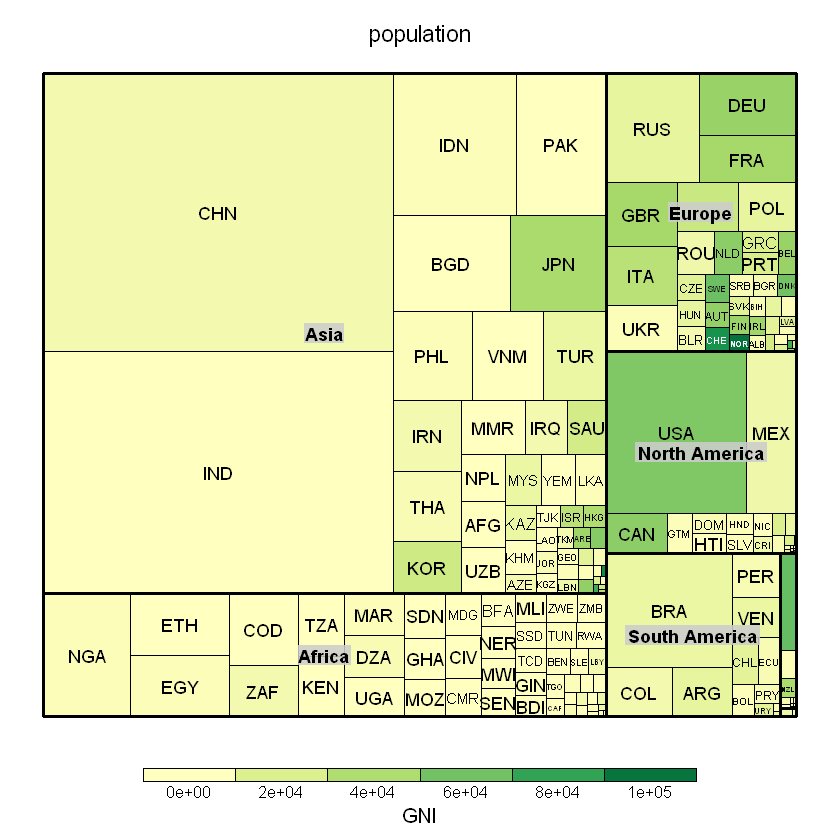

In [12]:
#나무지도 그림
install.packages("treemap")
install.packages("GNI2014")
library(treemap)
data(GNI2014)
treemap(GNI2014, index=c("continent", "iso3"), vSize="population", vColor="GNI",
         type="value") #연속형 변수 나타냄 명목형일 때는 type="categorical"

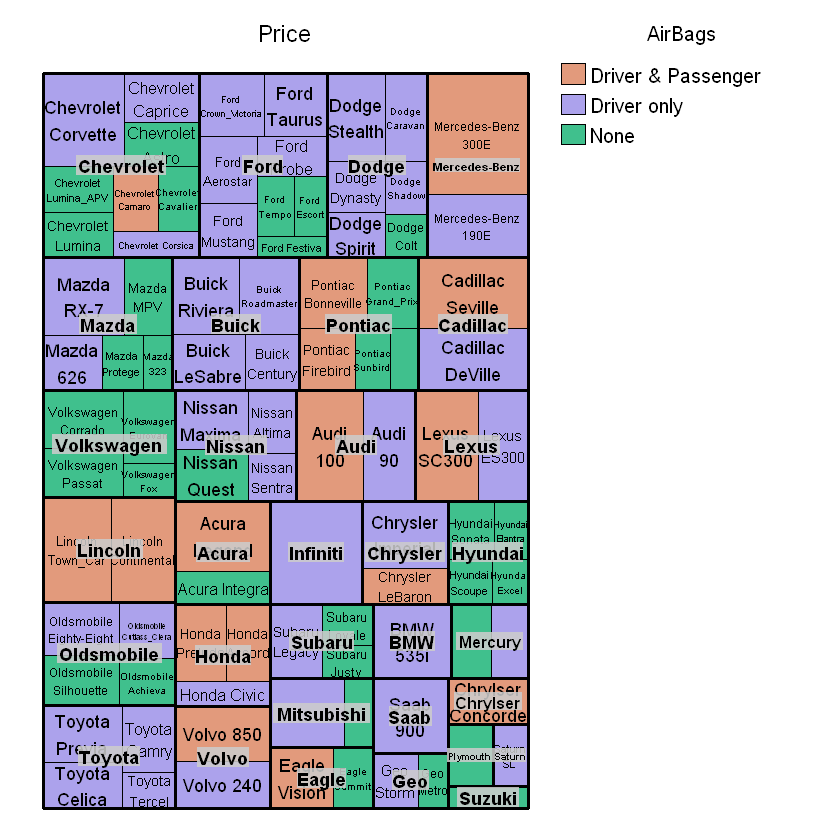

In [13]:
treemap(Cars93, index=c("Manufacturer","Make"), vSize="Price", vColor="AirBags", type="categorical")

also installing the dependencies 'bitops', 'caTools'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\allop\AppData\Local\Temp\RtmpOw5Yc1\downloaded_packages


Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



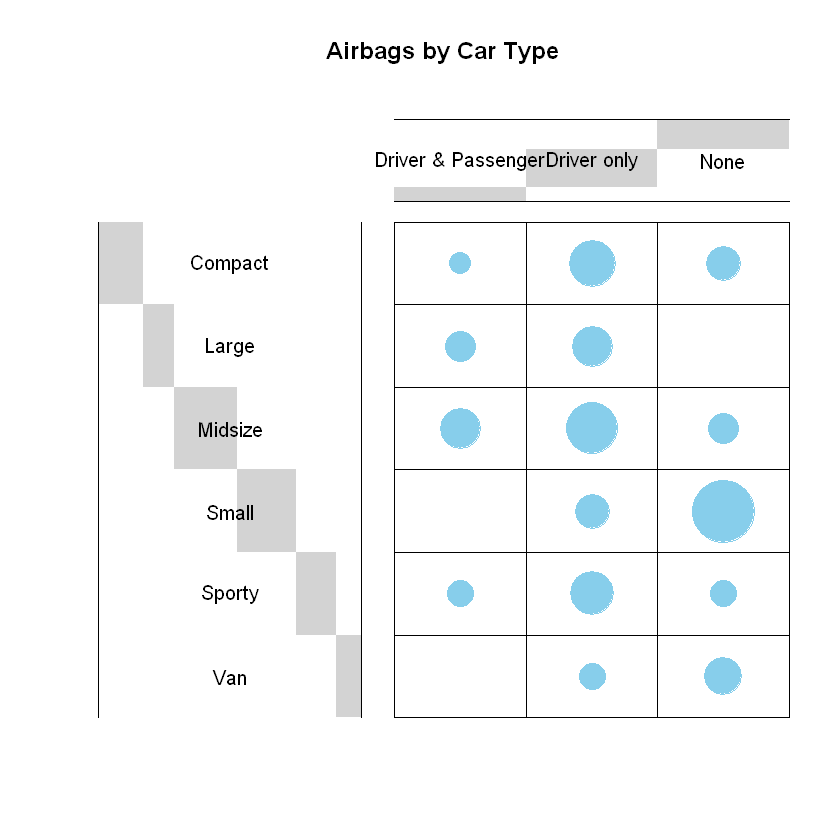

In [16]:
#풍선그림
install.packages("gplots")
library(gplots)
dt<-with(Cars93, xtabs(~AirBags+Type))
balloonplot(dt, main="Airbags by Car Type", xlab="", ylab="", label=FALSE,
            show.margins=FALSE)


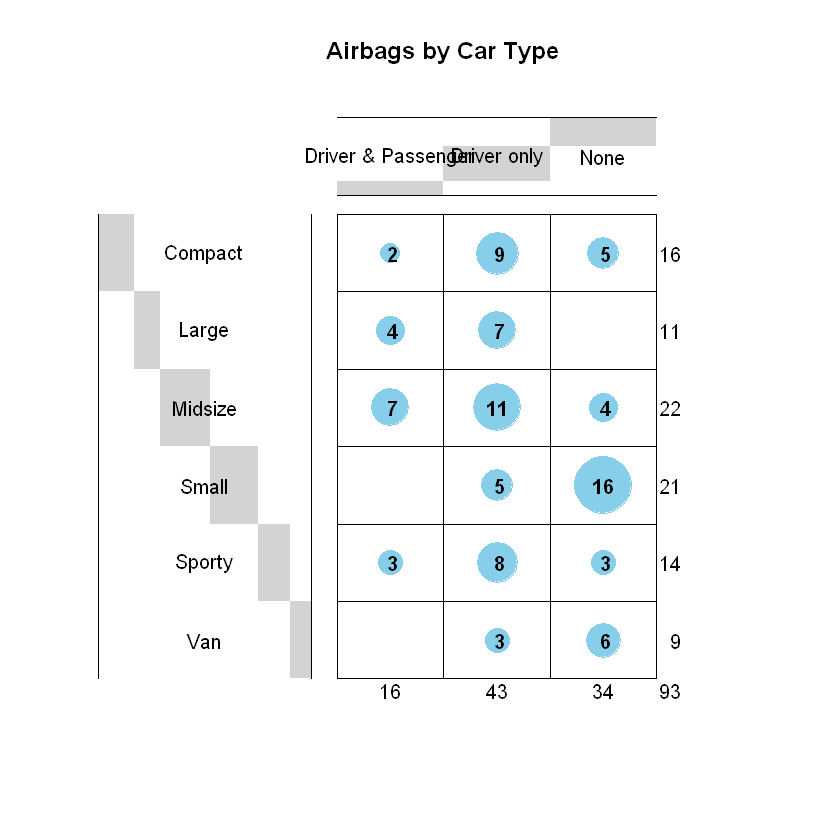

In [17]:
#실제 값 표시
balloonplot(dt, main="Airbags by Car Type", xlab="", ylab="", label=TRUE,
            show.margins=TRUE)

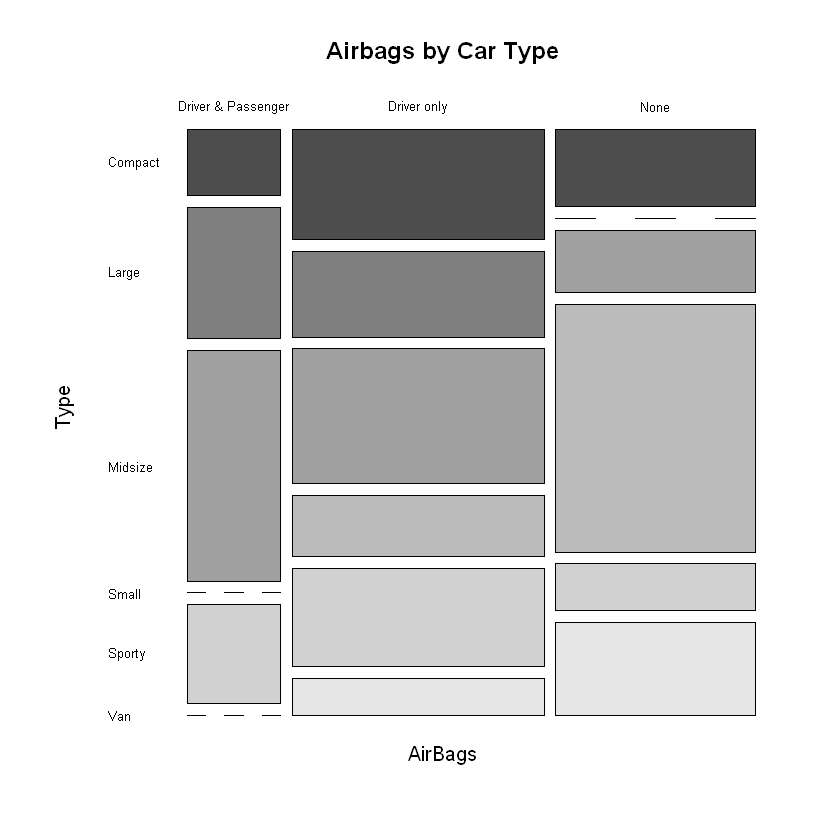

In [18]:
#기본 패키지 이용한 두 변수 모자이크 그림 
library(graphics)
mosaicplot(dt, color=TRUE, las=1, main="Airbags by Car Type")

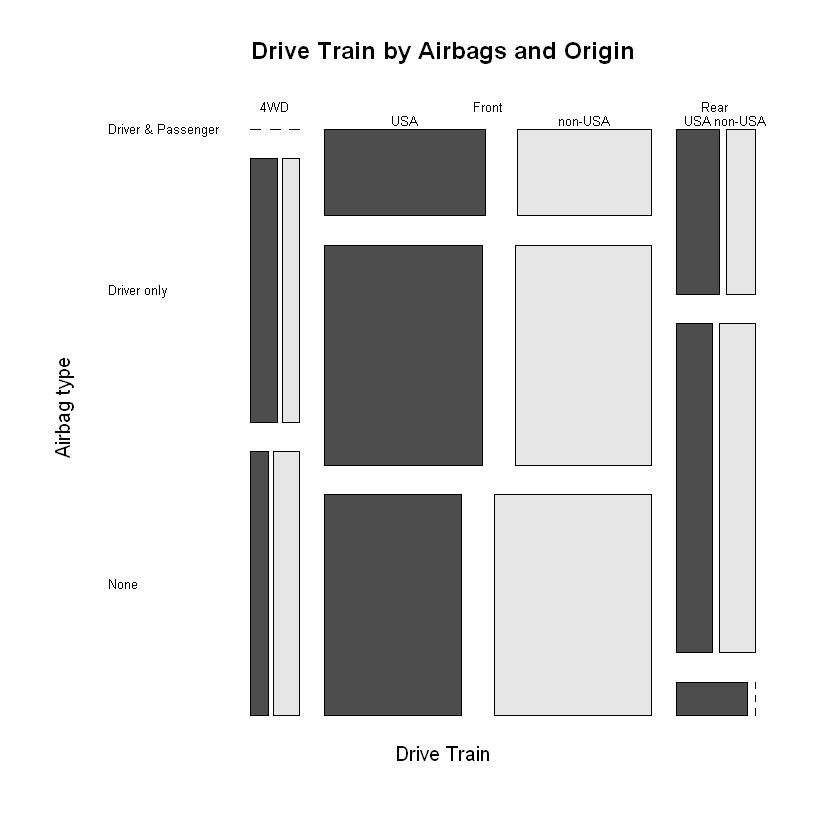

In [19]:
mosaicplot(~DriveTrain + AirBags + Origin, las=1, main="Drive Train by Airbags and Origin", ylab='Airbag type', xlab='Drive Train',
          data=Cars93, color=TRUE)